### Instacart 4.10 part 2 of 2 (continued) Coding etiquette<br>
Create a crosstab<br>
look at marital status<br>
pie chart of marital status

In [1]:
#import libraries
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# /* Create path (to project file), import 4.10 pickle file */
path = r'/Users/margoshogren/Desktop/1 Margo-CF Folder -desktop/4 Python/4-2023 Instacart Basket Analysis'
c_o_p410 = pd.read_pickle(os.path.join(path,'2 Data','prepared data','c_o_p410.pkl'))

#### Use the crosstab to excel to check the missing 'day_since_prior_order' to find out if all the missing values are for order 1.

In [5]:
crosstab = pd.crosstab(c_o_p410['days_since_prior_order'], c_o_p410['order_number'], dropna = False)

In [6]:
crosstab.to_clipboard()

#### Observation: Yes all the above are for order 1, so the values can be zero.

In [11]:
#Check the shape of the df, to make sure it is what we expected.
c_o_p410.shape

(30964564, 29)

In [12]:
c_o_p410.columns

Index(['user_id', 'First_Name', 'Last_Name', 'Gender', 'State', 'Age',
       'date_joined', 'no_of_dep', 'Marital_status', 'income', 'product_id',
       'product_name', 'aisle_id', 'department_id', 'prices', 'order_id',
       'order_number', 'orders_day_of_week', 'order_hour_of_day',
       'days_since_prior_order', 'add_to_cart_order', 'reordered', '_merge',
       'price_range_loc', 'Busiest_days', 'busiest_period_of_day', 'max_order',
       'Regions', '<_5_order'],
      dtype='object')

In [6]:
# What is most frequent marital status of customers
c_o_p410['Marital_status'].value_counts(dropna = False)

married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: Marital_status, dtype: int64

In [7]:
df_mar_st = c_o_p410['Marital_status'].value_counts(dropna = False).reset_index()

In [8]:
df_mar_st.head()

,index,Marital_status
0,married,21743711
1,single,5094410
2,divorced/widowed,2645271
3,living with parents and siblings,1481172


In [9]:
df_mar_st2 = df_mar_st.rename(columns = {'index':'Marital_stat','Marital_status':'count_of_family_status'})

In [10]:
df_mar_st2.head()

,Marital_stat,count_of_family_status
0,married,21743711
1,single,5094410
2,divorced/widowed,2645271
3,living with parents and siblings,1481172


In [11]:
df_mar_st2['Marital_stat'].astype(str)

0                             married
1                              single
2                    divorced/widowed
3    living with parents and siblings
Name: Marital_stat, dtype: object

## Pie chart of marital status

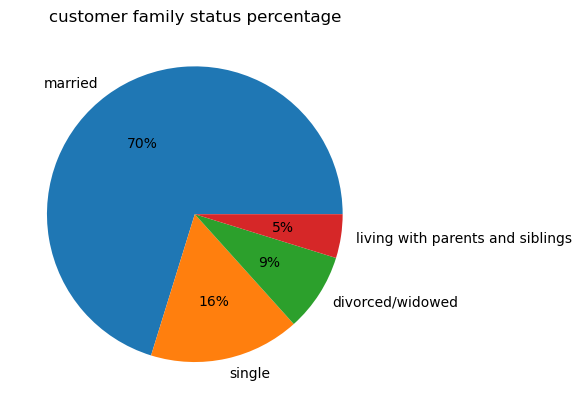

In [25]:
# add labels
label = ['married', 'single', 'divorced/widowed', 'living with parents and siblings']

#create pie plot with percents
plot = plt.pie(data = df_mar_st2,x='count_of_family_status', labels=label, autopct='%1.0f%%')

#delete legend
plt.legend().remove()

# title
plt.title('customer family status percentage')

# display chart
plt.show()


#### Observation: Most customers are married, followed by single

### Check for connection between age and family status

In [24]:
c_o_p410.groupby('Marital_status').agg({'Age':['mean','max','min']})

Age        
                                       mean max min
Marital_status                                     
divorced/widowed                  70.510585  81  60
living with parents and siblings  19.502090  21  18
married                           51.495620  81  22
single                            38.600037  59  18

In [15]:
c_o_p410.describe()

,user_id,Age,no_of_dep,income,product_id,aisle_id,department_id,prices,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,max_order
count,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,2.930328e+07,3.096456e+07,3.096456e+07,3.096456e+07
mean,1.029284e+05,4.946803e+01,1.501819e+00,9.967587e+04,2.559850e+04,7.118859e+01,9.922365e+00,7.789777e+00,1.710317e+06,1.783414e+01,2.741397e+00,1.341098e+01,1.081030e+01,8.363038e+00,6.061019e-01,3.442569e+01
std,5.947061e+04,1.848528e+01,1.118896e+00,4.314187e+04,1.408096e+04,3.822194e+01,6.282441e+00,4.240912e+00,9.873785e+05,1.763442e+01,2.089254e+00,4.248845e+00,8.578590e+00,7.135399e+00,4.886127e-01,2.489504e+01
min,1.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,5.000000e+00
25%,5.140900e+04,3.300000e+01,1.000000e+00,6.729200e+04,1.354400e+04,3.100000e+01,4.000000e+00,4.200000e+00,8.554120e+05,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,3.000000e+00,0.000000e+00,1.400000e+01
50%,1.025860e+05,4.900000e+01,2.000000e+00,9.676500e+04,2.528800e+04,8.300000e+01,9.000000e+00,7.400000e+00,1.710404e+06,1.200000e+01,3.000000e+00,1.300000e+01,7.000000e+00,6.000000e+00,1.000000e+00,2.800000e+01
75%,1.543870e+05,6.500000e+01,3.000000e+00,1.281020e+05,3.794700e+04,1.070000e+02,1.600000e+01,1.130000e+01,2.565206e+06,2.500000e+01,5.000000e+00,1.600000e+01,1.400000e+01,1.100000e+01,1.000000e+00,4.800000e+01
max,2.062090e+05,8.100000e+01,3.000000e+00,5.939010e+05,4.968800e+04,1.340000e+02,2.100000e+01,2.500000e+01,3.421083e+06,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,1.450000e+02,1.000000e+00,9.900000e+01


In [20]:
# Get the description of age, income, no of dependents
c_o_p410[['Age','income', 'no_of_dep']].describe()

,Age,income,no_of_dep
count,3.096456e+07,3.096456e+07,3.096456e+07
mean,4.946803e+01,9.967587e+04,1.501819e+00
std,1.848528e+01,4.314187e+04,1.118896e+00
min,1.800000e+01,2.590300e+04,0.000000e+00
25%,3.300000e+01,6.729200e+04,1.000000e+00
50%,4.900000e+01,9.676500e+04,2.000000e+00
75%,6.500000e+01,1.281020e+05,3.000000e+00
max,8.100000e+01,5.939010e+05,3.000000e+00


In [6]:
# get average income with the most orders
c_o_p410.groupby('max_order').agg({'income':['mean']})

,income
,mean
max_order,
5,96087.361539
6,97086.048266
7,97787.991357
8,97360.611677
9,97626.295238
...,...
95,104864.369424
96,88689.786196


In [14]:
# Find frequency of customer gender
c_o_p410['Gender'].value_counts(dropna = False)

Male      15586740
Female    15377824
Name: Gender, dtype: int64

In [ ]:
c_o_p410.groupby(['Regions']).agg({'product_name':['mean','max']})

### Create a df to look up products in the department_id's with highest means.

In [21]:
dept_id = c_o_p410.loc[c_o_p410['department_id'].isin([4,16])]

In [23]:
dept_id[['product_name','department_id']].value_counts(dropna = False)

product_name                                   department_id
Banana                                         4                453164
Bag of Organic Bananas                         4                366403
Organic Strawberries                           4                255988
Organic Baby Spinach                           4                231772
Organic Hass Avocado                           4                206799
                                                                 ...  
Yogurt, Coconut Non-Dairy, Low Fat, Blueberry  16                    1
Organic Lowfat Strawberry Yogurt Kefir         16                    1
Tomato Basil Gouda                             16                    1
Cinnamon Rice Pudding Snacks                   16                    1
Rosemary Medium Asiago Cheese Wedge            16                    1
Length: 5126, dtype: int64

In [32]:
dept_id.groupby(['department_id','product_name']).agg({'max_order':['mean','max']})

max_order  \
                                                                       mean   
department_id product_name                                                    
10            Apricots                                            38.943567   
              Cranberry Beans                                     25.652174   
              Crystallized Ginger Chunks                          36.054054   
              Dried Mango                                         39.746553   
              Fit Super A Juice, Cold Pressed, Carrot/Apple/G...  28.523077   
...                                                                     ...   
21            Yogurt                                              31.500000   
              Zebra Cake                                          14.500000   
              Zebra Popcorn                                       26.551724   
              Zero Lemon‑Lime Soda                                20.875000   
              Zero Peach Nutrient Enhanced Water Beverage          6.176471   

                                                                      
                                                                 max  
department_id product_name                                            
10            Apricots                                            99  
              Cranberry Beans                                     82  
              Crystallized Ginger Chunks                          99  
              Dried Mango                                         99  
              Fit Super A Juice, Cold Pressed, Carrot/Apple/G...  99  
...                                                               ..  
21            Yogurt                                              56  
              Zebra Cake                                          17  
              Zebra Popcorn                                       99  
              Zero Lemon‑Lime Soda                                34  
              Zero Peach Nutrient Enhanced Water Beverage          7  

[1285 rows x 2 columns]

In [31]:
#export pie chart
plt.savefig(os.path.join(path,'04 Analysis','Visualizations','pie_family_status.png'))

<Figure size 640x480 with 0 Axes>